In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [3]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

In [4]:
from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [5]:
color_vs_spectral_class = create_contingency_table(data, 'Spectral Class', 'Star color')

<AxesSubplot:xlabel='Star color'>

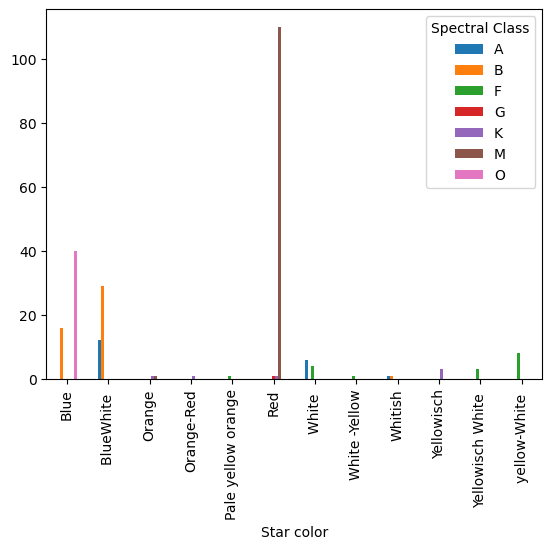

In [6]:
color_vs_spectral_class.plot(kind='bar')

In [7]:
check_cat_vs_cat_correlation(data, 'Star color','Spectral Class')

The odds of a correlation between Star color and Spectral Class is 100.0% (Based on a p value of 1.941945752112993e-123).
This percentage needs to be at least 95% for a significant correlation.


In [8]:
type_vs_spectral_class = create_contingency_table(data, 'Spectral Class', 'Star type')

<AxesSubplot:xlabel='Star type'>

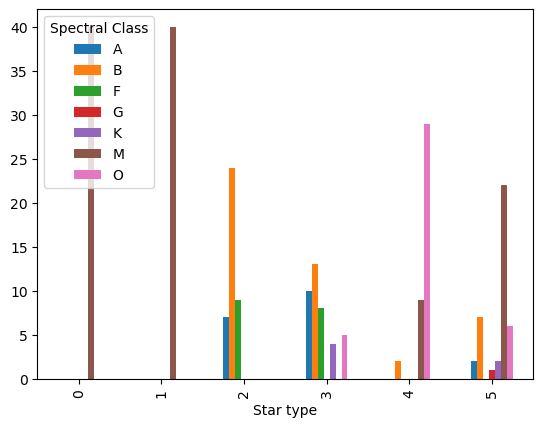

In [9]:
type_vs_spectral_class.plot(kind='bar')

In [10]:
check_cat_vs_cat_correlation(data, 'Star type','Spectral Class')

The odds of a correlation between Star type and Spectral Class is 100.0% (Based on a p value of 6.361278506929861e-52).
This percentage needs to be at least 95% for a significant correlation.


In [11]:
type_vs_color = create_contingency_table(data, 'Star color', 'Star type')

<AxesSubplot:xlabel='Star type'>

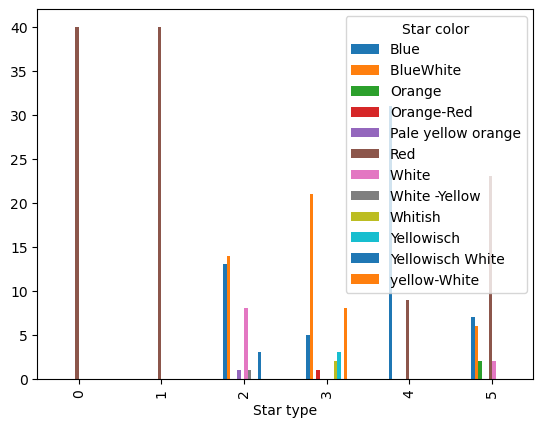

In [12]:
type_vs_color.plot(kind='bar')

In [13]:
check_cat_vs_cat_correlation(data, 'Star type','Star color')

The odds of a correlation between Star type and Star color is 100.0% (Based on a p value of 4.350553809143296e-46).
This percentage needs to be at least 95% for a significant correlation.
